In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Train dataset

In [2]:
# Load the Dataet
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_features = df.iloc[:,:-1]

In [6]:
df_features.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [7]:
target = df.iloc[:,-1]

In [8]:
target_df = target.to_frame()

In [9]:
target_df.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


### Diferentiate categorical and numerical data

In [10]:
cat_features = df_features.select_dtypes(include=['object'])
num_features = df_features.select_dtypes(include=['int64','float64'])

In [11]:
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### Categorical data cleaning

In [12]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [13]:
cat_features['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

### Filing null values with frequent category

In [14]:
freq_cat = cat_features['Outlet_Size'].value_counts().index[0]
freq_cat

'Medium'

In [15]:
cat_features['Outlet_Size'] = cat_features['Outlet_Size'].fillna(freq_cat)

In [16]:
cat_features.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [17]:
cat_features = cat_features.drop('Item_Identifier',axis=1)

In [18]:
cat_features.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


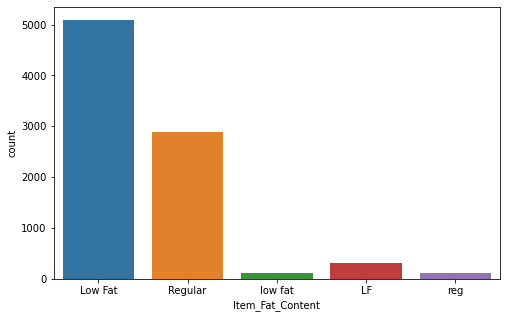

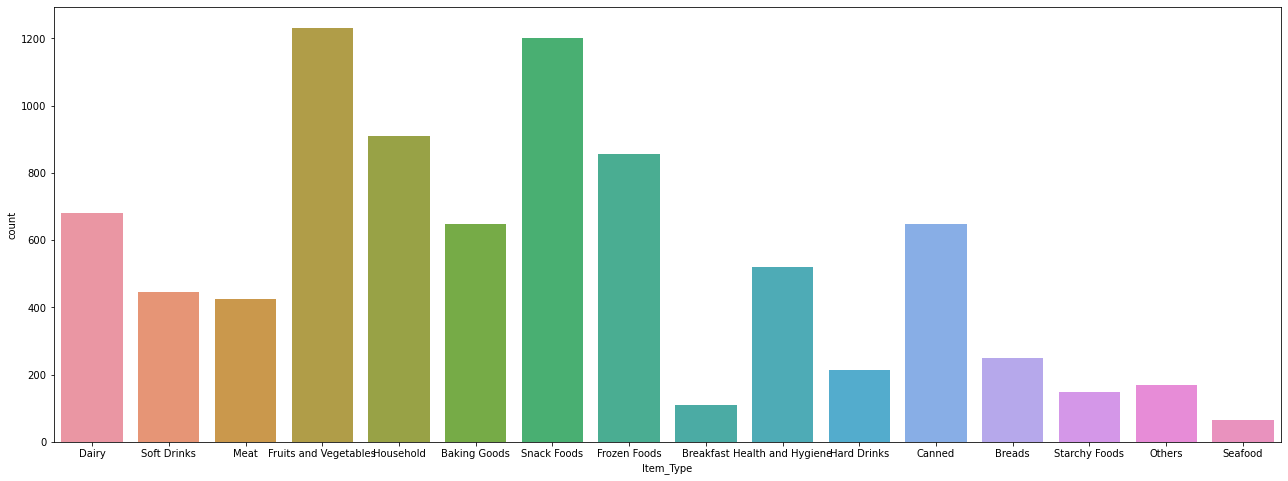

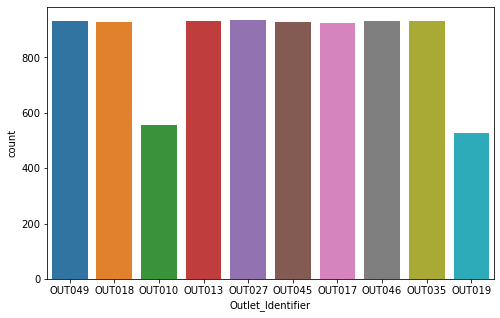

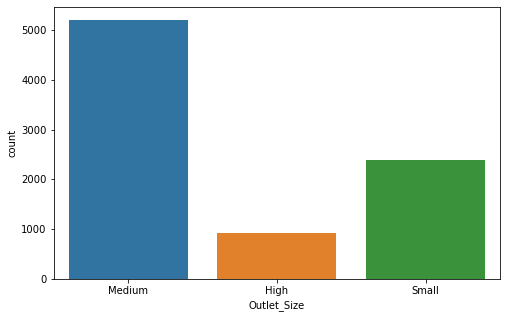

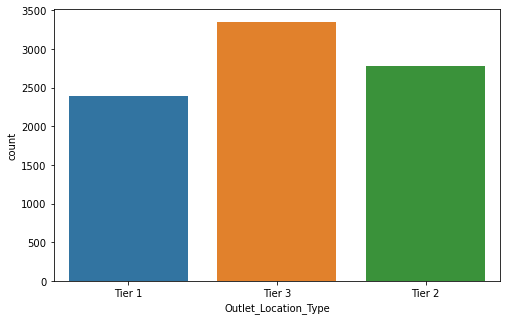

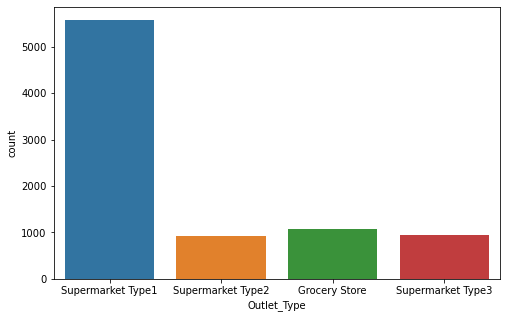

In [19]:
for i in cat_features.columns:
    if len(cat_features[i].unique())>10:
        plt.figure(figsize=(22,8))
        sns.countplot(cat_features[i])
        plt.show()
    else:
        plt.figure(figsize=(8,5))
        sns.countplot(cat_features[i])
        plt.show() 

### Label encoding categorical variables

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
cat_features.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [23]:
def label_encoder(cols):
    cat_features[cols] = encoder.fit_transform(cat_features[cols])

In [24]:
for i in cols:
    label_encoder(i)

In [25]:
cat_features 

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,9,1,0,1
1,2,14,3,1,2,2
2,1,10,9,1,0,1
3,2,6,0,1,2,0
4,1,9,1,0,2,1
...,...,...,...,...,...,...
8518,1,13,1,0,2,1
8519,2,0,7,1,1,1
8520,1,8,6,2,1,1
8521,2,13,3,1,2,2


### Numerical data cleaning 

In [26]:
num_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


In [27]:
num_features.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

### Filling null values with mean

In [28]:
num_features['Item_Weight'].mean()

12.857645184136183

In [29]:
num_features['Item_Weight'] = num_features['Item_Weight'].fillna(num_features['Item_Weight'].mean())

In [30]:
num_features.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [31]:
num_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


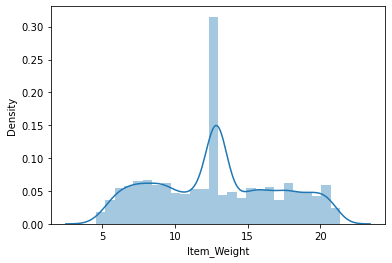

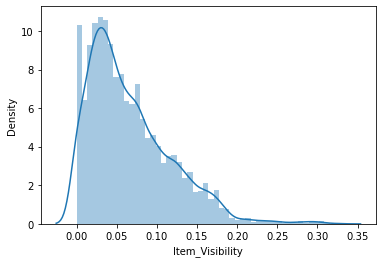

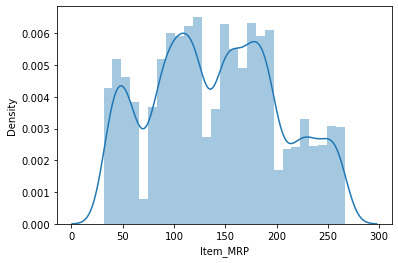

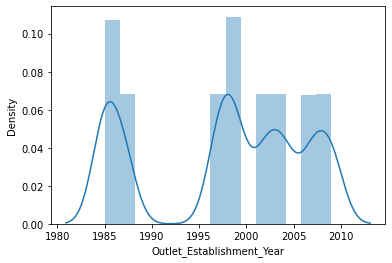

In [32]:
for i in num_features.columns:
    sns.distplot(num_features[i],kde=True)
    plt.show()

### Outlier treatment

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


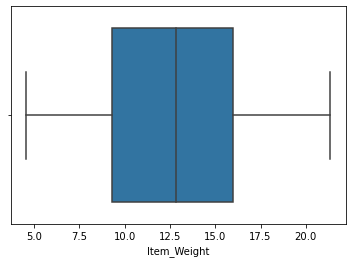

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


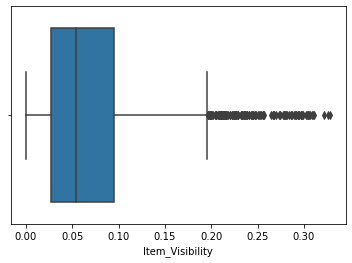

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


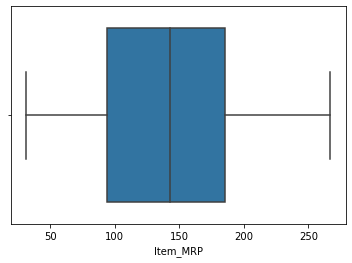

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


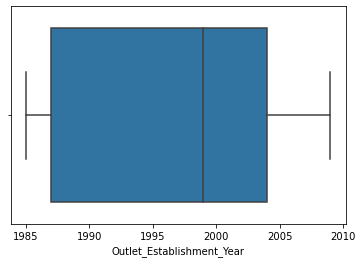

In [33]:
for i in num_features.columns:
    stats = num_features[i].describe()
    print(stats)
    sns.boxplot(num_features[i])
    plt.show()

 - The item visibility variable has outliers so it has to be treated

In [34]:
# outlier capping for Item_Visibility
q1 = num_features['Item_Visibility'].quantile(0.25)
q3 = num_features['Item_Visibility'].quantile(0.75)

In [35]:
iqr = q3 - q1
iqr

0.067595815

In [36]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [37]:
upper_limit,lower_limit

(0.195979015, -0.07440424500000001)

In [38]:
# Outlier capping
num_features['Item_Visibility'] = np.where(num_features['Item_Visibility'] > upper_limit, upper_limit,
            np.where(num_features['Item_Visibility'] < lower_limit, lower_limit, num_features['Item_Visibility']))

<AxesSubplot:xlabel='Item_Visibility'>

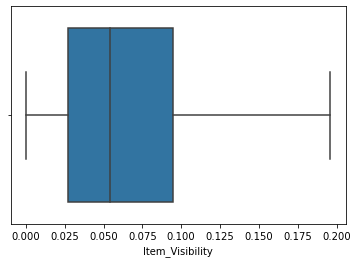

In [39]:
sns.boxplot(num_features['Item_Visibility'])

### Concatenating all the data after cleaning and encoding

In [40]:
# concatenation
new_df = pd.concat([cat_features,num_features,target_df],axis=1)

In [41]:
new_df.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,9,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,2,14,3,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,1,10,9,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,2,6,0,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,1,9,1,0,2,1,8.93,0.000000,53.8614,1987,994.7052


In [42]:
new_df.isnull().sum()

Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

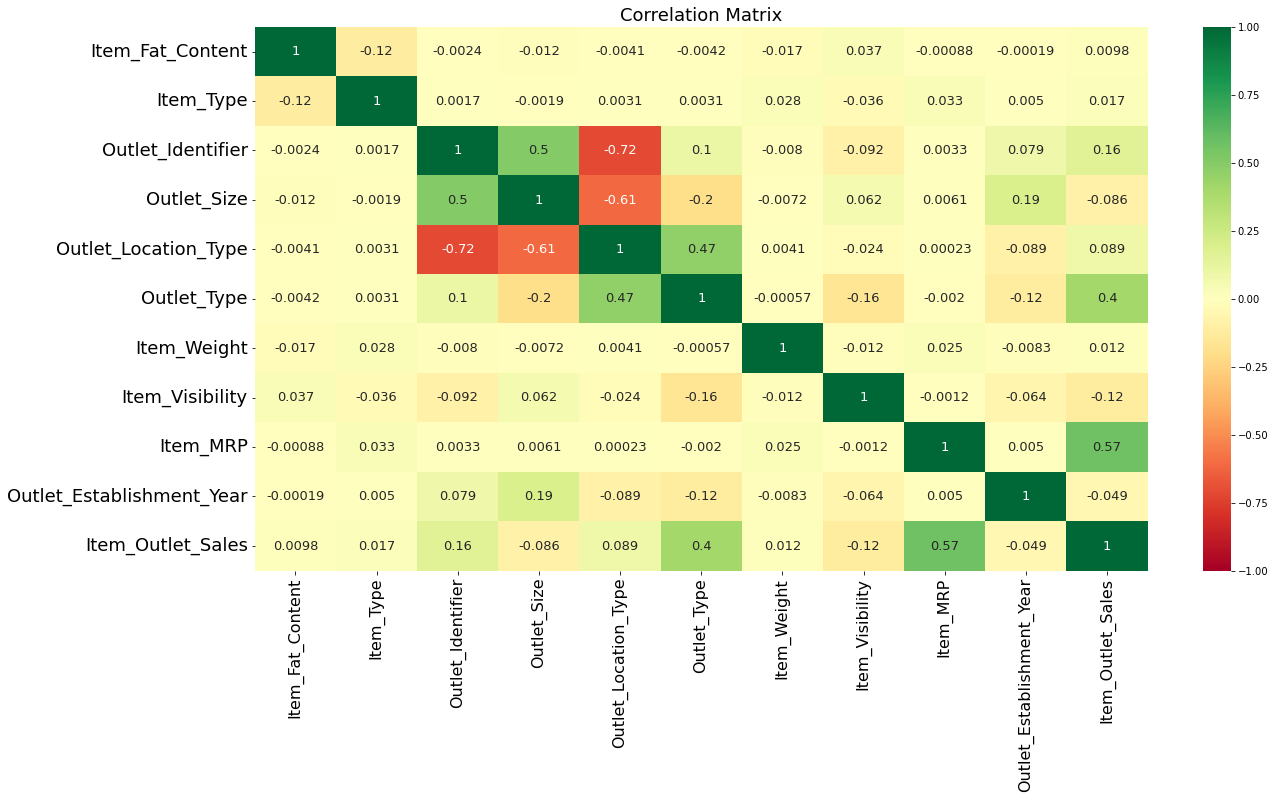

In [43]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix',fontsize=18)
corr = new_df.corr()
sns.heatmap(corr,cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='0.2g',annot_kws={'size':13})
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=18)
plt.show()

### Importing Regression Models

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost 
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [45]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [46]:
X.shape, y.shape

((8523, 10), (8523,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=105)

In [48]:
print('X_train shape',X_train.shape,'y_train shape', y_train.shape)
print('X_test shape',X_test.shape,'y_test shape', y_test.shape)

X_train shape (5966, 10) y_train shape (5966,)
X_test shape (2557, 10) y_test shape (2557,)


In [49]:
def train_and_test_split(data,target_col,test_size = 0.3,random_state=100):
    X = data.drop(target_col,axis=1)
    y = data[target_col]
    return train_test_split(X,y,test_size=test_size,random_state=random_state)

In [50]:
def model_builder(model_name,model,data,target_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data,target_col)
    model.fit(X_train,y_train)
    
    # Evalution on train data
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train,y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    
    # Evaluation on test data
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test,y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    
    result = [model_name,r2_train,r2_test]
    return result

In [51]:
def multiple_models(data,target_col):
    col_names = ['Model Name','r2_Score_train','r2_Score_test']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = model_builder('Linear Regression', LinearRegression(), data, target_col)
    result.loc[len(result)] = model_builder('Lasso Regression', Lasso(), data, target_col)
    result.loc[len(result)] = model_builder('Ridge Regression', Ridge(), data, target_col)
    result.loc[len(result)] = model_builder('DecisionTree Regression', DecisionTreeRegressor(), data,target_col)
    result.loc[len(result)] = model_builder('SVM Regression', SVR(), data, target_col)
    result.loc[len(result)] = model_builder('KNN Regression', KNeighborsRegressor(), data, target_col)
    result.loc[len(result)] = model_builder('RandomForest Regression', RandomForestRegressor(), data, target_col)
    result.loc[len(result)] = model_builder('AdaBoost Regression', AdaBoostRegressor(), data, target_col)
    result.loc[len(result)] = model_builder('Gradient Boosting Regression',GradientBoostingRegressor(), data, target_col)
    result.loc[len(result)] = model_builder('xgboost Regression',XGBRegressor(), data, target_col)
    
    return result.sort_values('r2_Score_test',ascending=False)
    

In [52]:
multiple_models(new_df,'Item_Outlet_Sales')

,Model Name,r2_Score_train,r2_Score_test
8,Gradient Boosting Regression,0.638409,0.591270
6,RandomForest Regression,0.937864,0.557076
9,xgboost Regression,0.874151,0.523912
0,Linear Regression,0.516167,0.494590
2,Ridge Regression,0.516161,0.494553
1,Lasso Regression,0.516013,0.494384
5,KNN Regression,0.663392,0.464773
7,AdaBoost Regression,0.450236,0.422865
3,DecisionTree Regression,1.000000,0.177352
4,SVM Regression,-0.049938,-0.051872


 - lets take gradient boosting as the predictive regressor for test data as it shows more accuracy to test data as compared to others

In [53]:
grb = GradientBoostingRegressor()

### Loading Test data

In [54]:
test_df = pd.read_csv('Test.csv')

In [55]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [56]:
cat_features = test_df.select_dtypes(include=['object'])
num_features = test_df.select_dtypes(include=['int64','float64'])

In [57]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [58]:
freq_cat = cat_features['Outlet_Size'].value_counts().index[0]
freq_cat

'Medium'

In [59]:
cat_features['Outlet_Size'] = cat_features['Outlet_Size'].fillna(freq_cat)

In [60]:
cat_features.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [61]:
cat_features = cat_features.drop('Item_Identifier',axis=1)

In [62]:
cat_features_copy = cat_features.copy()

In [63]:
cat_features.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [65]:
cat_features.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [66]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [67]:
def label_encoder(cols):
    cat_features[cols] = encoder.fit_transform(cat_features[cols])

In [68]:
for i in cols:
    label_encoder(i)

In [69]:
cat_features 

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,13,9,1,0,1
1,4,4,2,1,1,1
2,1,11,0,1,2,0
3,1,13,2,1,1,1
4,2,4,5,1,2,3
...,...,...,...,...,...,...
5676,2,13,8,2,0,1
5677,2,15,3,1,2,2
5678,1,8,7,1,1,1
5679,2,3,2,1,1,1


In [70]:
cat_features.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [71]:
num_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985


In [72]:
num_features.isnull().sum()

Item_Weight                  976
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64

In [73]:
num_features['Item_Weight'].mean()

12.695633368756374

In [74]:
num_features['Item_Weight'] = num_features['Item_Weight'].fillna(num_features['Item_Weight'].mean())

In [75]:
num_features.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [76]:
num_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985


count    5681.000000
mean       12.695633
std         4.245189
min         4.555000
25%         9.195000
50%        12.695633
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64


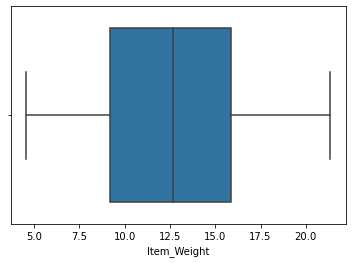

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64


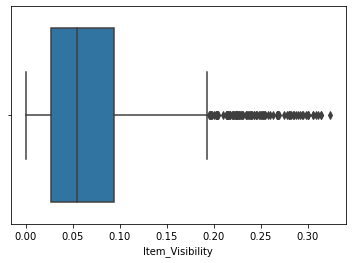

count    5681.000000
mean      141.023273
std        61.809091
min        31.990000
25%        94.412000
50%       141.415400
75%       186.026600
max       266.588400
Name: Item_MRP, dtype: float64


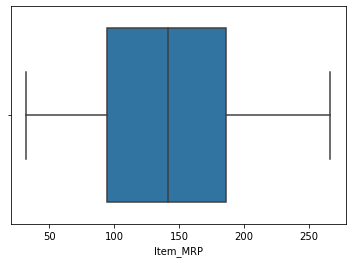

count    5681.000000
mean     1997.828903
std         8.372256
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


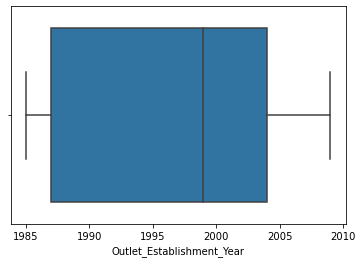

In [77]:
for i in num_features.columns:
    stats = num_features[i].describe()
    print(stats)
    sns.boxplot(num_features[i])
    plt.show()

In [78]:
# outlier capping for Item_Visibility
q1 = num_features['Item_Visibility'].quantile(0.25)
q3 = num_features['Item_Visibility'].quantile(0.75)

In [79]:
iqr = q3 - q1
iqr

0.066415748

In [80]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [81]:
upper_limit,lower_limit

(0.193086245, -0.072576747)

In [82]:
# Outlier capping
num_features['Item_Visibility'] = np.where(num_features['Item_Visibility'] > upper_limit, upper_limit,
            np.where(num_features['Item_Visibility'] < lower_limit, lower_limit, num_features['Item_Visibility']))

<AxesSubplot:xlabel='Item_Visibility'>

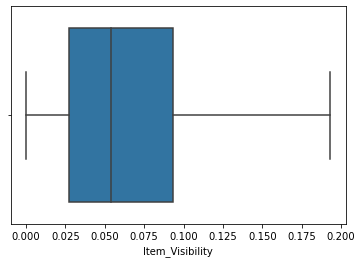

In [83]:
sns.boxplot(num_features['Item_Visibility'])

In [84]:
# concatenation
new_test_df = pd.concat([cat_features,num_features],axis=1)

In [85]:
new_test_df.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,13,9,1,0,1,20.750000,0.007565,107.8622,1999
1,4,4,2,1,1,1,8.300000,0.038428,87.3198,2007
2,1,11,0,1,2,0,14.600000,0.099575,241.7538,1998
3,1,13,2,1,1,1,7.315000,0.015388,155.0340,2007
4,2,4,5,1,2,3,12.695633,0.118599,234.2300,1985


In [86]:
new_test_df.isnull().sum()

Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

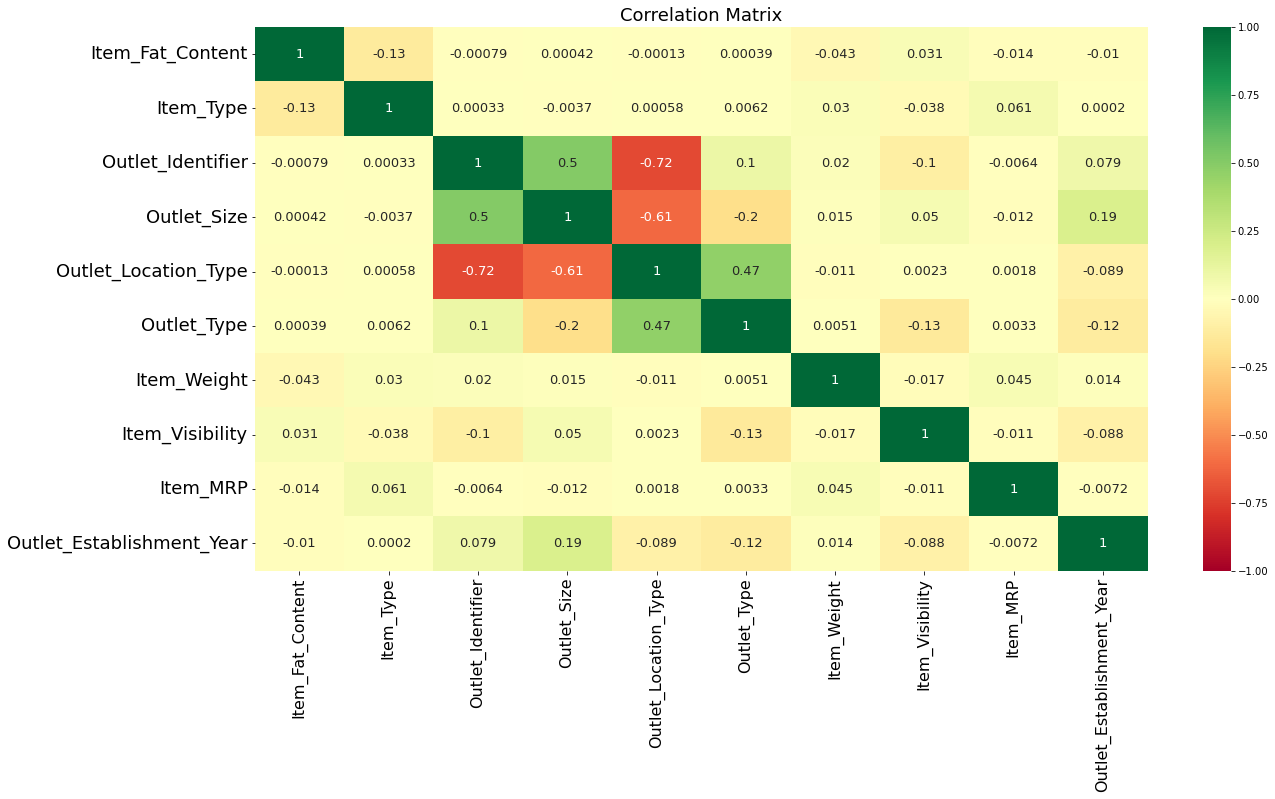

In [87]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix',fontsize=18)
corr = new_test_df.corr()
sns.heatmap(corr,cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='0.2g',annot_kws={'size':13})
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=18)
plt.show()

In [88]:
X_train = new_df.drop('Item_Outlet_Sales',axis=1)

In [89]:
X_train.isnull().sum()

Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [90]:
X_train

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,4,9,1,0,1,9.300,0.016047,249.8092,1999
1,2,14,3,1,2,2,5.920,0.019278,48.2692,2009
2,1,10,9,1,0,1,17.500,0.016760,141.6180,1999
3,2,6,0,1,2,0,19.200,0.000000,182.0950,1998
4,1,9,1,0,2,1,8.930,0.000000,53.8614,1987
...,...,...,...,...,...,...,...,...,...,...
8518,1,13,1,0,2,1,6.865,0.056783,214.5218,1987
8519,2,0,7,1,1,1,8.380,0.046982,108.1570,2002
8520,1,8,6,2,1,1,10.600,0.035186,85.1224,2004
8521,2,13,3,1,2,2,7.210,0.145221,103.1332,2009


In [91]:
y_train = target_df

In [92]:
y_train

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [93]:
X_test = new_test_df

In [94]:
grb.fit(X_train,y_train)

GradientBoostingRegressor()

In [95]:
y_pred = grb.predict(X_test)

In [96]:
y_pred

array([1619.97508066, 1419.37530361,  540.9474174 , ..., 1841.33202663,
       3798.51008724, 1281.47810865])

In [97]:
cat_features

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,13,9,1,0,1
1,4,4,2,1,1,1
2,1,11,0,1,2,0
3,1,13,2,1,1,1
4,2,4,5,1,2,3
...,...,...,...,...,...,...
5676,2,13,8,2,0,1
5677,2,15,3,1,2,2
5678,1,8,7,1,1,1
5679,2,3,2,1,1,1


In [98]:
final_test_df = pd.concat([cat_features_copy,num_features],axis=1)

In [99]:
final_test_df['tem_Outlet_Sales'] = pd.DataFrame(y_pred)

### Final Output

In [100]:
final_test_df

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,tem_Outlet_Sales
0,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1,20.750000,0.007565,107.8622,1999,1619.975081
1,reg,Dairy,OUT017,Medium,Tier 2,Supermarket Type1,8.300000,0.038428,87.3198,2007,1419.375304
2,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store,14.600000,0.099575,241.7538,1998,540.947417
3,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1,7.315000,0.015388,155.0340,2007,2553.924168
4,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3,12.695633,0.118599,234.2300,1985,6182.939231
...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,10.500000,0.013496,141.3154,1997,2136.118082
5677,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,7.600000,0.142991,169.1448,2009,2475.396629
5678,Low Fat,Health and Hygiene,OUT045,Medium,Tier 2,Supermarket Type1,10.000000,0.073529,118.7440,2002,1841.332027
5679,Regular,Canned,OUT017,Medium,Tier 2,Supermarket Type1,15.300000,0.000000,214.6218,2007,3798.510087
